In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


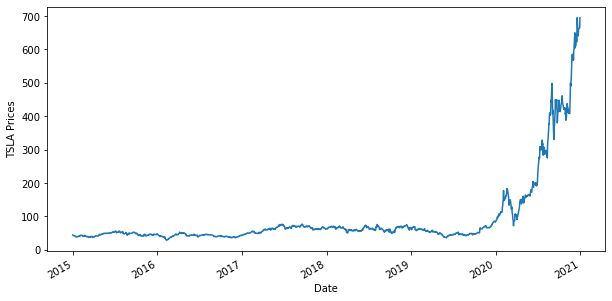

In [10]:
Df = yf.download('TSLA','2015-01-01','2020-12-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("TSLA Prices")
plt.show()

In [11]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2015-01-14,40.874667,42.172889
2015-01-15,39.943333,41.512444
2015-01-16,39.253999,40.902667
2015-01-20,38.508666,40.524444
2015-01-21,38.458000,40.094444


In [12]:
y = Df['Close']
y.head()

Date
2015-01-14    38.537998
2015-01-15    38.374001
2015-01-16    38.613998
2015-01-20    38.386002
2015-01-21    39.313999
Name: Close, dtype: float64

In [13]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [14]:
linear = LinearRegression().fit(X_train,y_train)

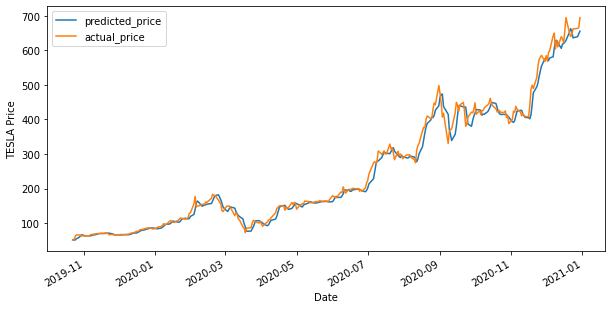

In [15]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("TESLA Price")  
plt.show()

In [16]:
r2_score = linear.score(X[t:],y[t:])*100 
float("{0:.2f}".format(r2_score))

98.8